# Chapter 3 - Linear Regression

Source: An Introduction to Statistical Learning

Notebook Source: [ISL-python](https://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/tree/master/Notebooks)

Datasets available on http://www-bcf.usc.edu/~gareth/ISL/data.html

### Loading Datasets

In [63]:
import pandas as pd
import numpy as np

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [14]:
advertising = pd.read_csv("./data/Advertising.csv", index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## 3.1 Simple Linear Regression

### Least Squares Fit
For the Advertising data, we will plot the least squares fit for the regression of `sales` onto `TV`.

The simple linear regression formula to indicate this relationship is:
    
`sales` ≈ $\beta_{0} + \beta_{1} x$ `TV`

In [13]:
# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


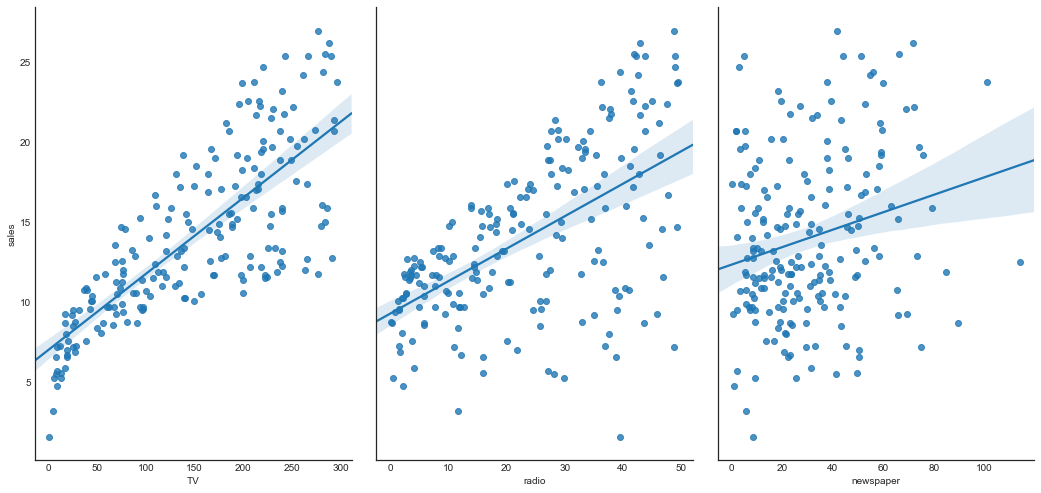

In [68]:
sns.pairplot(advertising, 
             x_vars=['TV', 'radio', 'newspaper'], 
             y_vars='sales', kind='reg',
            size = 7, aspect=0.7)

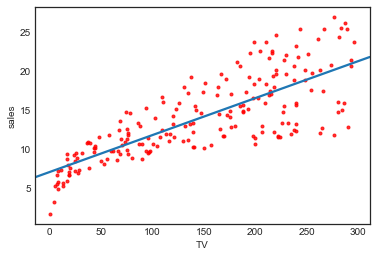

In [26]:
sns.regplot(advertising.TV, advertising.sales, order = 1,
           ci = None, scatter_kws={'color':'r', 's':9})

The fit is found by minimizing the sum of the squared errors. Each of the gray line segment represents an error, and the fit makes a compromise by averaging their squares. In this case a linear fit captures the essence of the relationship, although it is somewhat deficient in the left of the plot.

### Estimating Regression Coefficient

Now we define a linear regression model with the `sales` column as the response and the `TV` column as the feature in the `advertising` dataset.

In [78]:
# Ordinary Least Squares (ols) 

#create fitted model
lm = smf.ols(formula='sales ~ TV', data = advertising).fit()

print(lm.params,'\n')
print(lm.summary())


Intercept    7.032594
TV           0.047537
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 12 Jan 2019   Prob (F-statistic):           1.47e-42
Time:                        15:19:27   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

#### Scikit learn
We can also __estimate the model coefficients__ using `sckit-learn`

`.coef_` gives the coefficients and `.intercept_` gives the estimated intercepts.

In [72]:
from sklearn.linear_model import LinearRegression

# define the fetures
feature_cols = ['TV']
X = advertising[feature_cols]
y = advertising.sales
#X = advertising.TV.values.reshape(-1,1)

lm2 = skl_lm.LinearRegression()  # initiate linear regression

lm2.fit(X,y)   # fit the regression

# coefficients
print('Estimated intercept coefficient: ',lm2.intercept_)
print('Number of coefficients: ', lm2.coef_[0])

Estimated intercept coefficient:  7.032593549127693
Number of coefficients:  0.047536640433019764


### Interpreting Model Coefficients

We can interpre the `TV` coefficient (β1) as:
1. a unit increase in `TV` ad spending is __associated with__ a 0.047 "unit" increase in `Sales`.
2. Or more clearly: __An additional 1,000 spent on TV ads is assocated iwth a _decrease_ in `sales`(β1) would be _negative_.__

Therefore we cna concluse that in the absence of any advertising, sales will, on average, fall somewhere between 6,130 and 7,940 units. Furthermore, for each $1,000 increase in TV advertising, there will be an average increase in sales of between 42 and 53 units.

### Using the Model for Predictions.

> Lets say that there was a new market where the TV advertising spending was __50,000 dollars__. __What would we predict for the Sales in that makret?__

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [80]:
# manually calculate the prediction (basically plubg and caclulate)

print("TV sales widges would be: ",7.032594 + 0.047537*50, 
      " if TV advertising spend was $50,000 ")

TV sales widges would be:  9.409444  if TV advertising spend was $50,000 


In [81]:
# Statmodesl
# predict for a new observation
lm.predict(pd.DataFrame({'TV':[50]}))

0    9.409426
dtype: float64

In [82]:
# ScikitLearn
# predict for a new observation
lm2.predict(50)

array([9.40942557])

#### Interpretation of the Model Prediction

we would predict Sales of 9,409 widgets in that market.

## Confidence Internval (confidence in our model)
A closely related concept is confidence intervals. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was sampled 100 times, approximately 95 of those confidence intervals would contain the "true" coefficient. 

In [89]:
# statmodels
# confidence interval for the model coefficients
print(lm.conf_int())

                  0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843


In [90]:
print(lm.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053


#### Interpretation of the Confidence in our Model

From the regression results from above we can see in the case of the advertising data, the __95% confidence interval for $\beta_{0}$ is `[ 6.130, 7.935]` and the 95% confidence interval for $\beta_{1}$ is `[0.042, 0.053]`.__

_This is our estimate of the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is probably within_

## Hypothesis Testing & P-values

Standard errors can alos be used to perform hypothesis tests on the coefficient. 
$$H_0 : \beta_1 = 0$$ 
    
                (H0 : There is no relationship between X and Y)
    
$$H_a : \beta_1 = 0$$ 
        
                (Ha : There is some relationship between X and Y)

To test the null hypothesis, we will need to determine wither beta 1-hat (our estimate for beta1) is sufficiently far from zero that we can be confident that beta 1 is non-zero. We can compute this by using the _t-distribution_ to test this hypothesis:

$$t = \frac{\hat{\beta}_1-0}{SE(\hat{\beta}_1)}$$

Before performing the test we will check for normality assumption before using the test.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


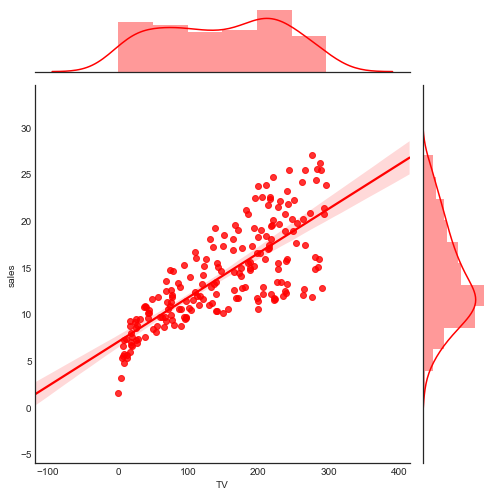

In [54]:
sns.jointplot("TV", "sales", data=advertising, kind="reg",
              color="r", height=7)

appears realitively normal. 

Next we will perform the t-test, to identify the probability of observing any real value equal to |t| or larger, assuming beta1 = 0. 

In [99]:
print(lm.summary().tables[1],"\n")
print("p-values TV for the model coefficients: ", lm.pvalues[1])
print("\nwe ignore the p-value for the intercept")

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053

p-values TV for the model coefficients:  1.4673897001946964e-42

we ignore the p-value for the intercept


The above table provides details of the least squares model for the regression of number of units sold on TV advertising budget for the Advertising data. Notice that the coeﬃcients for ˆ β0 and ˆ β1 are very large relative to their standard errors, so the t-statistics are also large; the probabilities of seeing such values if H0 is true are virtually zero. Hence we can conclude that β0 != 0 and β1 != 0

#### Conclusion
we see a small p-value we can infer that there is an association between the predictor and the response and we will __reject the null hypothesis__ that is, __we _believe_ there is a relaitonship between `TV` (X) and `sales` (Y), since the p-value is less than our alpha of 0.05.__

## Model Accuracy: How Well Does the Model Fit the data?

With the rejection of the null hypothesis we can use the __Residiual Standard Error (RSE) and R-Squiared__ to quantify _the extent to which the model fits the data_.

#### R Squared
The most common way to evaluate the overall fit of a linear model is by the R-squared value. R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model.

In [60]:
print(est.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 12 Jan 2019   Prob (F-statistic):           1.47e-42
Time:                        11:59:24   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         


Above in the linear model regression results we can see that:
- R-squared = 0.612
- F-statisitic = 312.1

In [102]:
# statmodels
# the R-squared value for the model
lm.rsquared

0.611875050850071

In [103]:
# ScikitLearn
# the R-squared value for the model
lm2.score(X, y)

0.611875050850071

#### Interpretation

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for comparing different models.

In [10]:
credit = pd.read_csv("./data/Credit.csv", index_col=0)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [12]:
# create a new column to indicate binary value of student No = 0; Yes = 1
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.Student2.head(2)

1    0
2    1
Name: Student2, dtype: int64

#### Key Sources

* [justmarkham's adaption of ISL - Linear Regression](https://github.com/justmarkham/DAT5/blob/master/notebooks/09_linear_regression.ipynb)